In [ ]:
!pip install kaggle
from google.colab import files 
#files.open('/content/drive/MyDrive/Colab Notebooks/json kaggle')
files.upload() #download and upload json file

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d merahul28/covid19-vaccine-related-tweets

 90% 82.0M/91.3M [00:01<00:00, 57.4MB/s]
100% 91.3M/91.3M [00:01<00:00, 89.5MB/s]


In [ ]:
!kaggle datasets download -d ritesh2000/covid19-vaccine-tweets

 91% 31.0M/34.1M [00:00<00:00, 31.2MB/s]
100% 34.1M/34.1M [00:00<00:00, 61.2MB/s]


In [ ]:
from zipfile import ZipFile
file_name= "covid19-vaccine-tweets.zip"

with ZipFile(file_name ,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
from zipfile import ZipFile
file_name= "covid19-vaccine-related-tweets.zip"

with ZipFile(file_name ,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
#import library

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder   ###########
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.manifold import TSNE ######
from sklearn.feature_extraction.text import TfidfVectorizer #############

from keras.preprocessing.text import Tokenizer         #######
from keras.preprocessing.sequence import pad_sequences #######
from keras.models import Sequential
from keras.layers import Dropout , Conv1D ,MaxPool1D,Activation , Dense , Flatten , Embedding , LSTM ####

from keras import utils
from keras.callbacks import ReduceLROnPlateau , EarlyStopping


#nltk

import nltk
from nltk.corpus import stopwords ########
from nltk.stem import SnowballStemmer ############


#word to vec
import gensim

import re #####
import os
from collections import Counter #######
import logging ###
import time
import pickle ######
import itertools ######


from textblob import TextBlob # TextBlob - Python library for processing textual data
import random
np.random.seed(0)


# import SentimentIntensityAnalyzer class
# from vaderSentiment.vaderSentiment module.
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [ ]:
#load data 
df1 = pd.read_csv('/content/file.csv')
df2=pd.read_csv('/content/COVID-Vaccine Related tweets NOV1 to DEC16.csv')

In [ ]:
display(df2)

,date,time,user_id,username,name,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,link
0,16-12-2020,04:37:24,1.369881e+08,beforethestars,Andrea Davison,"Vegetarians here is a reason ""AZD1222 (ChAdOx1...",en,[],[],[],0,3,3,[],https://twitter.com/beforethestars/status/1338...
1,16-12-2020,04:03:02,1.458063e+09,artofhitech,Техно Ньюс !,AstraZeneca начинает клинические испытания вак...,ru,[],[],[],0,0,0,[],https://twitter.com/ArtOfHiTech/status/1338975...
2,16-12-2020,03:39:43,1.412535e+07,n6mac41717,Chuck Han,@ByLizC 1) Let's see what the US Phase III tri...,en,[],[],[],0,0,0,[],https://twitter.com/n6mac41717/status/13389695...
3,16-12-2020,03:30:18,3.312676e+09,codigofmx,codigof.mx,"El pasado 11 de diciembre, el laboratorio Astr...",es,[],['http://ow.ly/iu8o50CMlt5'],['https://pbs.twimg.com/media/EpT3hY_W8AM6C_x....,0,0,4,[],https://twitter.com/codigofmx/status/133896714...
4,16-12-2020,01:39:04,9.536980e+17,ae1tt,"Deborah A Nicholas, M.D.",@sabrigley @IncognitoNewt @thespybrief Yep. Pu...,en,[],['https://www.thelancet.com/journals/lancet/ar...,[],1,0,6,[],https://twitter.com/AE1TT/status/1338939149072...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686100,01-11-2020,07:35:53,1.336240e+08,vrtarak,viggy,@imeghanavirat Kadhu India dhi covaxin valu ip...,in,[],[],[],3,0,0,[],https://twitter.com/VRtarak/status/13227214928...
686101,01-11-2020,07:33:47,1.039760e+18,tv9bharatvarsh,TV9 Bharatvarsh,#Covaxin के तीसरे फेज का ट्रायल जल्द होगा शुरू...,hi,[],['https://www.tv9bharatvarsh.com/india/corona-...,[],0,0,15,"['covaxin', 'coronavirus', 'covid19']",https://twitter.com/TV9Bharatvarsh/status/1322...
686102,01-11-2020,07:26:19,1.336240e+08,vrtarak,viggy,@imeghanavirat Russia la vaccine odaladame at ...,in,[],[],[],1,0,0,[],https://twitter.com/VRtarak/status/13227190842...
686103,01-11-2020,07:02:32,1.238370e+18,covidmexico,Covid México,ste candidato ha entrado en ensayos de Fase 2....,es,[],[],[],1,1,0,[],https://twitter.com/CovidMexico/status/1322713...


In [ ]:
df2.columns

Index(['date', 'time', 'user_id', 'username', 'name', 'tweet', 'language',
       'mentions', 'urls', 'photos', 'replies_count', 'retweets_count',
       'likes_count', 'hashtags', 'link'],
      dtype='object')

In [ ]:
df2.head()

,date,time,user_id,username,name,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,link
0,16-12-2020,04:37:24,1.369881e+08,beforethestars,Andrea Davison,"Vegetarians here is a reason ""AZD1222 (ChAdOx1...",en,[],[],[],0,3,3,[],https://twitter.com/beforethestars/status/1338...
1,16-12-2020,04:03:02,1.458063e+09,artofhitech,Техно Ньюс !,AstraZeneca начинает клинические испытания вак...,ru,[],[],[],0,0,0,[],https://twitter.com/ArtOfHiTech/status/1338975...
2,16-12-2020,03:39:43,1.412535e+07,n6mac41717,Chuck Han,@ByLizC 1) Let's see what the US Phase III tri...,en,[],[],[],0,0,0,[],https://twitter.com/n6mac41717/status/13389695...
3,16-12-2020,03:30:18,3.312676e+09,codigofmx,codigof.mx,"El pasado 11 de diciembre, el laboratorio Astr...",es,[],['http://ow.ly/iu8o50CMlt5'],['https://pbs.twimg.com/media/EpT3hY_W8AM6C_x....,0,0,4,[],https://twitter.com/codigofmx/status/133896714...
4,16-12-2020,01:39:04,9.536980e+17,ae1tt,"Deborah A Nicholas, M.D.",@sabrigley @IncognitoNewt @thespybrief Yep. Pu...,en,[],['https://www.thelancet.com/journals/lancet/ar...,[],1,0,6,[],https://twitter.com/AE1TT/status/1338939149072...


In [ ]:
from pandas import datetime 

df2['date'] = pd.to_datetime(df2['date'])
df2['Month'] = df2['date'].dt.month
df2['Month-str-full'] = df2['date'].dt.strftime('%B')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [ ]:
df2['Month-str-full'].value_counts()

November     235000
December     127569
October       61870
September     61747
August        39862
March         33318
February      31353
April         28618
May           21633
July          19290
June          14970
January       10875
Name: Month-str-full, dtype: int64

In [ ]:

print(min(df2['date']))
print(max(df2['date']))

2020-01-11 00:00:00
2020-12-16 00:00:00


In [ ]:
print(min(df1['date']))
print(max(df1['date']))

2020-02-12
2020-10-22


In [ ]:
df2 = df2[df2['language']=='en']
df2 = df2[['date' , 'tweet']]

In [ ]:
df1 = df1[df1['language']=='en']
df1 = df1[['date' , 'tweet']]

In [ ]:
df1.head()

,date,tweet
0,2020-10-22,@ANI Isn't it the best poll promise ever?? Fre...
1,2020-10-22,Now states shall have wait for thier Vidhan Sa...
3,2020-10-22,@MisseeMonis They said vaccine for all but not...
4,2020-10-22,"BJP really presenting ""free COVID vaccine"" as ..."
5,2020-10-22,Another dose of daily miserablism from Planet ...


In [ ]:
df2.head()

,date,tweet
0,2020-12-16,"Vegetarians here is a reason ""AZD1222 (ChAdOx1..."
2,2020-12-16,@ByLizC 1) Let's see what the US Phase III tri...
4,2020-12-16,@sabrigley @IncognitoNewt @thespybrief Yep. Pu...
5,2020-12-16,@IncognitoNewt @thespybrief Lancet published i...
6,2020-12-16,AZD1222 Oxford Phase III trials interim analys...


In [ ]:

df2['tweet'].isna().sum()

0

In [ ]:
df2['date'].isna().sum()

0

In [ ]:
df1['tweet'].isna().sum()

0

In [ ]:
df1['date'].isna().sum()

0

In [ ]:
print(df1.shape)
print(df2.shape)

(201030, 2)
(573016, 2)


In [ ]:
data = pd.concat([df1,df2],ignore_index=True)
data.head()

,date,tweet
0,2020-10-22,@ANI Isn't it the best poll promise ever?? Fre...
1,2020-10-22,Now states shall have wait for thier Vidhan Sa...
2,2020-10-22,@MisseeMonis They said vaccine for all but not...
3,2020-10-22,"BJP really presenting ""free COVID vaccine"" as ..."
4,2020-10-22,Another dose of daily miserablism from Planet ...


In [ ]:
data.shape

(774046, 2)

In [ ]:
data.drop_duplicates(subset=['tweet'])
data.shape

(774046, 2)

In [ ]:
data['process_tweet'] = data['tweet'].copy()
data.head()

,date,tweet,process_tweet
0,2020-10-22,@ANI Isn't it the best poll promise ever?? Fre...,@ANI Isn't it the best poll promise ever?? Fre...
1,2020-10-22,Now states shall have wait for thier Vidhan Sa...,Now states shall have wait for thier Vidhan Sa...
2,2020-10-22,@MisseeMonis They said vaccine for all but not...,@MisseeMonis They said vaccine for all but not...
3,2020-10-22,"BJP really presenting ""free COVID vaccine"" as ...","BJP really presenting ""free COVID vaccine"" as ..."
4,2020-10-22,Another dose of daily miserablism from Planet ...,Another dose of daily miserablism from Planet ...


# Preprocessing the Tweet


In [ ]:
def clean_data(txt):
  txt = txt.lower()  # lowercase
  txt = re.sub(r'@[A-Za-z0-9_]+' , '' , txt)   #remove mentions
  txt = re.sub(r'#' , '' , txt) #remove hashtags
  txt = re.sub(r'RT : ','' , txt) # remove retweets
  txt = re.sub(r'https?:\/\/[A-Za-z0-9\./\/]+' , '' , txt) #removes url
  txt = re.sub('\[.*?\]' , '' , txt) #remove square brackets
  txt = re.sub(r'[^\w\s]' , '' , txt) #remove puntuations
  txt = re.sub('\w*\d\w*' , '' ,txt) #removes words containig numbers
  txt = re.sub('\n' , '' ,txt) #remove new lines
 

  return txt


In [ ]:
data['process_tweet'] = data['process_tweet'].apply(clean_data)
data['process_tweet']

0          isnt it the best poll promise ever free covid...
1         now states shall have wait for thier vidhan sa...
2          they said vaccine for all but not when free c...
3         bjp really presenting free covid vaccine as a ...
4         another dose of daily miserablism from planet ...
                                ...                        
774041    covaxin has been developed in collaboration wi...
774042    bharat biotech is planning to launch its vacci...
774043     vaccine amu medical college to begin covaxin ...
774044    bharat biotech to launch covaxin in    india n...
774045    the aiims in delhi is likely to submit a propo...
Name: process_tweet, Length: 774046, dtype: object

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#removig stop words

stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(txt):
  rmv_stpwords = [i for i in txt.split() if i not in stopwords]
  rmv_stpwords_join = ' '.join(rmv_stpwords)
  return rmv_stpwords_join

 

In [ ]:
data['process_tweet'] = data['process_tweet'].apply(remove_stopwords)

data.head()#after removing stopwords

,date,tweet,process_tweet
0,2020-10-22,@ANI Isn't it the best poll promise ever?? Fre...,isnt best poll promise ever free covid vaccine...
1,2020-10-22,Now states shall have wait for thier Vidhan Sa...,states shall wait thier vidhan sabha election ...
2,2020-10-22,@MisseeMonis They said vaccine for all but not...,said vaccine free covid vaccine new lakhs rs e...
3,2020-10-22,"BJP really presenting ""free COVID vaccine"" as ...",bjp really presenting free covid vaccine state...
4,2020-10-22,Another dose of daily miserablism from Planet ...,another dose daily miserablism planet grauniad...


In [ ]:
from nltk.stem import PorterStemmer
st = PorterStemmer()

In [ ]:
def stemming(txt):
  txt =[st.stem(word) for word in txt.split()]
  txt_join = ' '.join(txt)
  return txt_join

#Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach.

In [ ]:
data['process_tweet'] = data['process_tweet'].apply(stemming)
data.head()

,date,tweet,process_tweet
0,2020-10-22,@ANI Isn't it the best poll promise ever?? Fre...,isnt best poll promis ever free covid vaccin v...
1,2020-10-22,Now states shall have wait for thier Vidhan Sa...,state shall wait thier vidhan sabha elect get ...
2,2020-10-22,@MisseeMonis They said vaccine for all but not...,said vaccin free covid vaccin new lakh rs ever...
3,2020-10-22,"BJP really presenting ""free COVID vaccine"" as ...",bjp realli present free covid vaccin state man...
4,2020-10-22,Another dose of daily miserablism from Planet ...,anoth dose daili miserabl planet grauniad sub ...


In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 7.2MB/s 


In [ ]:
data.head()

,date,tweet,process_tweet
0,2020-10-22,@ANI Isn't it the best poll promise ever?? Fre...,isnt best poll promis ever free covid vaccin v...
1,2020-10-22,Now states shall have wait for thier Vidhan Sa...,state shall wait thier vidhan sabha elect get ...
2,2020-10-22,@MisseeMonis They said vaccine for all but not...,said vaccin free covid vaccin new lakh rs ever...
3,2020-10-22,"BJP really presenting ""free COVID vaccine"" as ...",bjp realli present free covid vaccin state man...
4,2020-10-22,Another dose of daily miserablism from Planet ...,anoth dose daili miserabl planet grauniad sub ...


In [ ]:

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
data['Polarity_Vader'] = data['process_tweet'].apply(lambda txt: sid.polarity_scores(txt)['compound'])
data.head()

,date,tweet,process_tweet,Polarity_Vader
0,2020-10-22,@ANI Isn't it the best poll promise ever?? Fre...,isnt best poll promis ever free covid vaccin v...,-0.7482
1,2020-10-22,Now states shall have wait for thier Vidhan Sa...,state shall wait thier vidhan sabha elect get ...,0.0000
2,2020-10-22,@MisseeMonis They said vaccine for all but not...,said vaccin free covid vaccin new lakh rs ever...,0.7717
3,2020-10-22,"BJP really presenting ""free COVID vaccine"" as ...",bjp realli present free covid vaccin state man...,0.7964
4,2020-10-22,Another dose of daily miserablism from Planet ...,anoth dose daili miserabl planet grauniad sub ...,0.4404


# Labeling

5 labels: 
strongly positive,
positive,
nuteral,
negative,
strongly negetative.


In [ ]:

def get_text_polarity(txt):
  return TextBlob(txt).sentiment.polarity

In [ ]:
#add 2 columns(subjectivity and polarity) to the data

#data['Subjectivity'] = data['process_tweet'].apply(get_text_subjectivity)

data['Polarity_textblob'] = data['process_tweet'].apply(get_text_polarity)

In [ ]:


#Labeling
def get_text_analysis(i):
  if (i<-0.5):
    return 'Strongly Against'
  elif ((i<0 ) and (i >= -0.5)):
    return 'Against'
  elif (i == 0):
    return 'Neutral'
  elif (i>0 and i<=0.5):
    return 'Favour'
  else:
    return 'Strongly in Favour'



In [ ]:
data['Sentiment_TB'] = data['Polarity_textblob'].apply(get_text_analysis)


In [ ]:
data['Sentiment_VADER'] = data['Polarity_Vader'].apply(get_text_analysis)

In [ ]:
data.head()

,date,tweet,process_tweet,Polarity_Vader,Polarity_textblob,Sentiment_TB,Sentiment_VADER
0,2020-10-22,@ANI Isn't it the best poll promise ever?? Fre...,isnt best poll promis ever free covid vaccin v...,-0.7482,0.197500,Favour,Strongly Against
1,2020-10-22,Now states shall have wait for thier Vidhan Sa...,state shall wait thier vidhan sabha elect get ...,0.0000,0.800000,Strongly in Favour,Neutral
2,2020-10-22,@MisseeMonis They said vaccine for all but not...,said vaccin free covid vaccin new lakh rs ever...,0.7717,0.378788,Favour,Strongly in Favour
3,2020-10-22,"BJP really presenting ""free COVID vaccine"" as ...",bjp realli present free covid vaccin state man...,0.7964,0.500000,Favour,Strongly in Favour
4,2020-10-22,Another dose of daily miserablism from Planet ...,anoth dose daili miserabl planet grauniad sub ...,0.4404,0.000000,Neutral,Favour


In [ ]:
possible_labels = data.Sentiment_TB.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels): 
#The enumerate() function takes a collection (e.g. a tuple) and returns it as an enumerate object.
    label_dict[possible_label] = index

data['label_TB'] = data.Sentiment_TB.replace(label_dict)



In [ ]:
#possible_labels = data.Sentiment_VADER.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels): 
#The enumerate() function takes a collection (e.g. a tuple) and returns it as an enumerate object.
    label_dict[possible_label] = index

data['label_VD'] = data.Sentiment_VADER.replace(label_dict)


In [ ]:
possible_labels

array(['Favour', 'Strongly in Favour', 'Neutral', 'Against',
       'Strongly Against'], dtype=object)

In [ ]:
from sklearn.utils import shuffle
data = shuffle(data)
data.reset_index(inplace=True, drop=True)
data.head()

,date,tweet,process_tweet,Polarity_Vader,Polarity_textblob,Sentiment_TB,Sentiment_VADER,label_TB,label_VD
0,2020-09-11 00:00:00,Pfizer expects to file an #eua for its #corona...,pfizer expect file eua coronaviru vaccin soon ...,0.2263,0.000,Neutral,Favour,2,0
1,2020-09-12 00:00:00,15 years from now the Covid vaccine will be a ...,year covid vaccin normal thing understand relu...,0.0000,0.175,Favour,Neutral,0,2
2,2020-06-09,@iamShaniera Well said!! Unfortunately this di...,well said unfortun diseas u refer limit peopl ...,-0.1027,-0.800,Strongly Against,Against,4,3
3,2020-12-11 00:00:00,@drsimonegold @ezralevant @Ticketmaster I look...,look forward scalp covidvaccin paperwork park lot,0.0000,0.000,Neutral,Neutral,2,2
4,2020-12-15 00:00:00,I hope the covid vaccine mutates and gives eve...,hope covid vaccin mutat give everyon superpow,0.4404,0.000,Neutral,Favour,2,0


In [ ]:
data1=data.copy()

In [ ]:
df=data[['date','Sentiment_TB' ,'label_TB','Sentiment_VADER' ,'label_VD']]
data = data[['process_tweet','Sentiment_TB' ,'label_TB','Sentiment_VADER' ,'label_VD']]
data.head()



,process_tweet,Sentiment_TB,label_TB,Sentiment_VADER,label_VD
0,pfizer expect file eua coronaviru vaccin soon ...,Neutral,2,Favour,0
1,year covid vaccin normal thing understand relu...,Favour,0,Neutral,2
2,well said unfortun diseas u refer limit peopl ...,Strongly Against,4,Against,3
3,look forward scalp covidvaccin paperwork park lot,Neutral,2,Neutral,2
4,hope covid vaccin mutat give everyon superpow,Neutral,2,Favour,0


In [ ]:
from sklearn.utils import shuffle
df = shuffle(df)
df.reset_index(inplace=True, drop=True)
df.head()

,date,Sentiment_TB,label_TB,Sentiment_VADER,label_VD
0,2020-10-12 00:00:00,Neutral,2,Strongly Against,4
1,2020-06-12 00:00:00,Favour,0,Neutral,2
2,2020-11-14 00:00:00,Neutral,2,Against,3
3,2020-01-12 00:00:00,Neutral,2,Neutral,2
4,2020-11-19 00:00:00,Neutral,2,Strongly Against,4


In [ ]:
df["date"] = pd.to_datetime(df['date'])

df = df.sort_values(by='date')
display(df)

,date,Sentiment_TB,label_TB,Sentiment_VADER,label_VD
455142,2020-01-11,Neutral,2,Neutral,2
340542,2020-01-11,Against,3,Favour,0
6520,2020-01-11,Neutral,2,Neutral,2
443864,2020-01-11,Neutral,2,Neutral,2
734485,2020-01-11,Favour,0,Favour,0
...,...,...,...,...,...
587739,2020-12-16,Neutral,2,Neutral,2
8002,2020-12-16,Favour,0,Neutral,2
354511,2020-12-16,Favour,0,Strongly in Favour,1
300333,2020-12-16,Against,3,Neutral,2


In [ ]:
df['mnth_yr'] = df['date'].apply(lambda x: x.strftime('%B-%Y')) 
df.head()

,date,Sentiment_TB,label_TB,Sentiment_VADER,label_VD,mnth_yr
455142,2020-01-11,Neutral,2,Neutral,2,January-2020
340542,2020-01-11,Against,3,Favour,0,January-2020
6520,2020-01-11,Neutral,2,Neutral,2,January-2020
443864,2020-01-11,Neutral,2,Neutral,2,January-2020
734485,2020-01-11,Favour,0,Favour,0,January-2020


In [ ]:
from sklearn.utils import shuffle
df = shuffle(df)
df.reset_index(inplace=True, drop=True)
df.head()

,date,Sentiment_TB,label_TB,Sentiment_VADER,label_VD,mnth_yr
0,2020-09-09,Neutral,2,Neutral,2,September-2020
1,2020-08-28,Favour,0,Favour,0,August-2020
2,2020-11-24,Neutral,2,Against,3,November-2020
3,2020-11-18,Neutral,2,Against,3,November-2020
4,2020-12-13,Favour,0,Strongly in Favour,1,December-2020


In [ ]:
df['mnth_yr'].unique()

array(['September-2020', 'August-2020', 'November-2020', 'December-2020',
       'April-2020', 'January-2020', 'October-2020', 'July-2020',
       'February-2020', 'June-2020', 'March-2020', 'May-2020'],
      dtype=object)

In [ ]:
df['Year'] = pd.DatetimeIndex(df['date']).year  
df['Year'].unique()

array([2020])

In [ ]:
from pandas import datetime 

df['date'] = pd.to_datetime(df['date'])
df['Month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['Month-str-full'] = df['date'].dt.strftime('%B')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [ ]:
possible_months = df['Month-str-full'].unique()
print(possible_labels)
print(possible_months)

['Favour' 'Strongly in Favour' 'Neutral' 'Against' 'Strongly Against']
['September' 'August' 'November' 'December' 'April' 'January' 'October'
 'July' 'February' 'June' 'March' 'May']


In [ ]:
df.head()

,date,Sentiment_TB,label_TB,Sentiment_VADER,label_VD,mnth_yr,Year,Month,year,Month-str-full
0,2020-09-09,Neutral,2,Neutral,2,September-2020,2020,9,2020,September
1,2020-08-28,Favour,0,Favour,0,August-2020,2020,8,2020,August
2,2020-11-24,Neutral,2,Against,3,November-2020,2020,11,2020,November
3,2020-11-18,Neutral,2,Against,3,November-2020,2020,11,2020,November
4,2020-12-13,Favour,0,Strongly in Favour,1,December-2020,2020,12,2020,December


In [ ]:
df['Month-str-full'].value_counts()

November     194118
December     109639
September    106590
August        77587
October       76572
July          50109
April         33751
May           33423
March         29425
February      28447
June          25018
January        9367
Name: Month-str-full, dtype: int64

In [ ]:
df.rename(columns={'Month':'M'}, inplace=True)
df.rename(columns={'Month-str-full':'Month'}, inplace=True)

In [ ]:
df['Month'] = df['Month'].str.replace('January', 'Jan')
df['Month'] = df['Month'].str.replace('February', 'Feb')
df['Month'] = df['Month'].str.replace('August', 'Aug')
df['Month'] = df['Month'].str.replace('September', 'Sep')
df['Month'] = df['Month'].str.replace('October', 'Oct')
df['Month'] = df['Month'].str.replace('November', 'Nov')
df['Month'] = df['Month'].str.replace('December', 'Dec')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


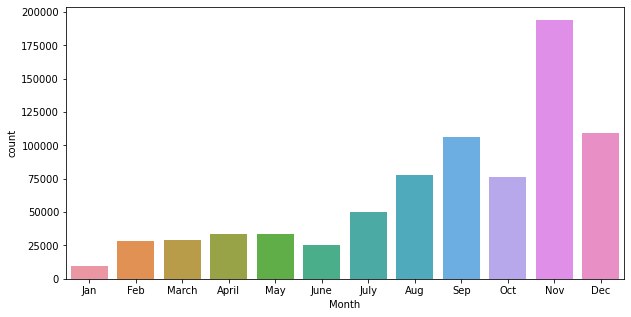

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,5))

sns.countplot(df['Month'],order=['Jan','Feb','March','April','May','June','July','Aug','Sep','Oct','Nov','Dec']);

In [ ]:
df_new = data.copy()

#df_new.rename(columns={'Sentiment' : 'Data'} , inplace= True)

df_new.head()

,process_tweet,Sentiment_TB,label_TB,Sentiment_VADER,label_VD
0,pfizer expect file eua coronaviru vaccin soon ...,Neutral,2,Favour,0
1,year covid vaccin normal thing understand relu...,Favour,0,Neutral,2
2,well said unfortun diseas u refer limit peopl ...,Strongly Against,4,Against,3
3,look forward scalp covidvaccin paperwork park lot,Neutral,2,Neutral,2
4,hope covid vaccin mutat give everyon superpow,Neutral,2,Favour,0


Text(0, 0.5, 'Num of Tweet ')

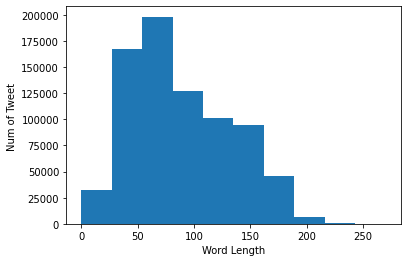

In [ ]:
data['process_tweet'].str.len().plot.hist()
plt.xlabel('Word Length')
plt.ylabel('Num of Tweet ')

In [ ]:
#import library for deep learning
from sklearn.model_selection import train_test_split


from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
from time import time 
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,Activation,Embedding,Flatten,Bidirectional,MaxPooling2D, Conv1D, MaxPooling1D
from keras.optimizers import SGD,Adam
from keras import regularizers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical

In [ ]:

#for deep learning we need to only 2 colums(sentiment and process tweet)
data = data[['Sentiment_VADER','process_tweet' ]]
data.head()

,Sentiment_VADER,process_tweet
0,Favour,pfizer expect file eua coronaviru vaccin soon ...
1,Neutral,year covid vaccin normal thing understand relu...
2,Against,well said unfortun diseas u refer limit peopl ...
3,Neutral,look forward scalp covidvaccin paperwork park lot
4,Favour,hope covid vaccin mutat give everyon superpow


In [ ]:
data1 = data.copy()      #########    for experiment ,max_words

In [ ]:
data1.head()

,Sentiment_VADER,process_tweet
0,Favour,pfizer expect file eua coronaviru vaccin soon ...
1,Neutral,year covid vaccin normal thing understand relu...
2,Against,well said unfortun diseas u refer limit peopl ...
3,Neutral,look forward scalp covidvaccin paperwork park lot
4,Favour,hope covid vaccin mutat give everyon superpow


In [ ]:
data1 = data1.reset_index(drop=True) #for removing missig index 

#see previous index 3 is replaced by new index 2
data1.head() 

,Sentiment_VADER,process_tweet
0,Favour,pfizer expect file eua coronaviru vaccin soon ...
1,Neutral,year covid vaccin normal thing understand relu...
2,Against,well said unfortun diseas u refer limit peopl ...
3,Neutral,look forward scalp covidvaccin paperwork park lot
4,Favour,hope covid vaccin mutat give everyon superpow


In [ ]:
uniqueWords = list(set(" ".join(data['process_tweet']).lower().split(" ")))
count = len(uniqueWords)
print(count)

165769


In [ ]:
#tokenization
tokenizer = Tokenizer(num_words=count, split=' ')
#num_words: the maximum number of words to keep, based on word frequency. Only the most common num_words-1 words will be kept.


tokenizer.fit_on_texts(data1['process_tweet'].values)

X = tokenizer.texts_to_sequences(data1['process_tweet'].values)

In [ ]:
X[:3] #before padding

[[6,
  143,
  1213,
  1121,
  3,
  1,
  126,
  1121,
  146,
  334,
  467,
  1121,
  69,
  376,
  226,
  1,
  1252,
  1731,
  6,
  674],
 [30, 2, 1, 273, 116, 417, 3282, 294, 362, 40],
 [93,
  54,
  1739,
  320,
  319,
  1542,
  873,
  7,
  1128,
  1882,
  43555,
  892,
  18,
  428,
  1403,
  10,
  72,
  68,
  42,
  2,
  1,
  1751,
  18,
  62752,
  123,
  82,
  1335,
  1138]]

In [ ]:
#padding to make all text vector to same length

X = pad_sequences(X)

X[:3] #after padding

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     6,   143,  1213,  1121,     3,
            1,   126,  1121,   146,   334,   467,  1121,    69,   376,
          226,     1,  1252,  1731,     6,   674],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,    30,     2,     1,   273,
          116,   417,  3282,   294,   362,    40],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,    

In [ ]:
X.shape[1]

51

In [ ]:
model= Sequential()
model.add(Embedding(count, 256 , input_length=X.shape[1]))
model.add(Conv1D(200, kernel_size=3, activation = "relu"))
model.add(Dropout(0.3))
model.add(LSTM(128 , return_sequences=True , dropout=0.3 , recurrent_dropout=0.3))
model.add(LSTM(128,dropout=0.3 , recurrent_dropout=0.3))
model.add(Flatten())
model.add(Dense(5, activation='softmax'))

adam=Adam(learning_rate=0.0005,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False)
model.summary()
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 51, 256)           42436864  
_________________________________________________________________
conv1d (Conv1D)              (None, 49, 200)           153800    
_________________________________________________________________
dropout (Dropout)            (None, 49, 200)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 49, 128)           168448    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6

In [ ]:


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 51, 256)           42436864  
_________________________________________________________________
conv1d (Conv1D)              (None, 49, 200)           153800    
_________________________________________________________________
dropout (Dropout)            (None, 49, 200)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 49, 128)           168448    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6

In [ ]:
#one hot encoding

y = pd.get_dummies(data1['Sentiment_VADER']).values

[print(data1['Sentiment_VADER'][i] ,y[i]) for i in range(0,5)]

Favour [0 1 0 0 0]
Neutral [0 0 1 0 0]
Against [1 0 0 0 0]
Neutral [0 0 1 0 0]
Favour [0 1 0 0 0]


[None, None, None, None, None]

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 ,random_state = 22)

In [ ]:
#trannig model
batch_size = 128
epochs = 5

In [ ]:
history = model.fit(x_train , y_train ,
          epochs = epochs,
          batch_size = batch_size,
          validation_split=0.1,
          verbose=1)

Epoch 1/5
4354/4354 [==============================] - 2393s 537ms/step - loss: 0.4191 - accuracy: 0.8447 - val_loss: 0.0889 - val_accuracy: 0.9688
Epoch 2/5
4354/4354 [==============================] - 2332s 536ms/step - loss: 0.0804 - accuracy: 0.9719 - val_loss: 0.0672 - val_accuracy: 0.9776
Epoch 3/5
4354/4354 [==============================] - 2324s 534ms/step - loss: 0.0566 - accuracy: 0.9802 - val_loss: 0.0604 - val_accuracy: 0.9794
Epoch 4/5
4354/4354 [==============================] - 2322s 533ms/step - loss: 0.0447 - accuracy: 0.9848 - val_loss: 0.0618 - val_accuracy: 0.9792
Epoch 5/5
4354/4354 [==============================] - 2311s 531ms/step - loss: 0.0358 - accuracy: 0.9875 - val_loss: 0.0634 - val_accuracy: 0.9791


In [ ]:
predictions = model.predict(x_test)
print('done')

done


In [ ]:
print(predictions)

[[5.22212872e-07 3.27232228e-05 3.20263247e-08 2.45096021e-06
  9.99964237e-01]
 [9.98413920e-01 1.23405107e-03 3.29617527e-04 2.18927034e-05
  5.79740174e-07]
 [1.50455626e-05 6.07847596e-06 9.99962687e-01 1.22015699e-05
  4.01804846e-06]
 ...
 [6.94595292e-05 8.00465001e-04 8.32355340e-07 1.13054135e-04
  9.99016166e-01]
 [9.98404324e-01 2.96740764e-04 1.19354110e-03 9.89025066e-05
  6.51000937e-06]
 [1.42376700e-06 1.20170560e-04 4.10835924e-07 5.33964794e-06
  9.99872684e-01]]


In [ ]:
%%time
score = model.evaluate(x_test, y_test , batch_size = batch_size)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

1210/1210 [==============================] - 36s 30ms/step - loss: 0.0643 - accuracy: 0.9785

ACCURACY: 0.978515625
LOSS: 0.06432363390922546
CPU times: user 35.9 s, sys: 764 ms, total: 36.7 s
Wall time: 35.9 s


In [ ]:
[print(data1['process_tweet'][i], predictions[i], y_test[i] ) for i in range(1, 3)
]

year covid vaccin normal thing understand reluct deal real time [9.9841392e-01 1.2340511e-03 3.2961753e-04 2.1892703e-05 5.7974017e-07] [1 0 0 0 0]
well said unfortun diseas u refer limit peopl specif color peabrain idiot like guy everywher say let start test covid vaccin moron like himmayb that way contribut societi [1.5045563e-05 6.0784760e-06 9.9996269e-01 1.2201570e-05 4.0180485e-06] [0 0 1 0 0]


[None, None]

In [ ]:

pred1 = np.argmax(predictions , axis=1)
pred1[:10]

array([4, 0, 2, 2, 4, 2, 2, 1, 1, 0])

In [ ]:
y_test = np.argmax(y_test , axis=1)


In [ ]:


print(y_train.shape)
print(x_train.shape)  #160824 trainnig data

(619236, 5)
(619236, 51)


In [ ]:
print(y_test.shape)
print(x_test.shape)     #40206 test data

(154810,)
(154810, 51)


In [ ]:
print(confusion_matrix(y_test , pred1 ,normalize=None))

[[19778   270    22   616     9]
 [  633 33171    28    31   377]
 [  286   153 63301     3     2]
 [  262    44     7 13902     5]
 [   71   489     4    14 21332]]


In [ ]:
print(confusion_matrix(y_test , pred1))

[[19778   270    22   616     9]
 [  633 33171    28    31   377]
 [  286   153 63301     3     2]
 [  262    44     7 13902     5]
 [   71   489     4    14 21332]]


In [ ]:
print(classification_report(y_test , pred1))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     20695
           1       0.97      0.97      0.97     34240
           2       1.00      0.99      1.00     63745
           3       0.95      0.98      0.97     14220
           4       0.98      0.97      0.98     21910

    accuracy                           0.98    154810
   macro avg       0.97      0.97      0.97    154810
weighted avg       0.98      0.98      0.98    154810



In [ ]:
accuracy_score(y_test , pred1)

0.9785155997674568

In [ ]:
print(confusion_matrix(y_test , pred1))

[[19778   270    22   616     9]
 [  633 33171    28    31   377]
 [  286   153 63301     3     2]
 [  262    44     7 13902     5]
 [   71   489     4    14 21332]]


In [ ]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred1)

0.1268974872424262

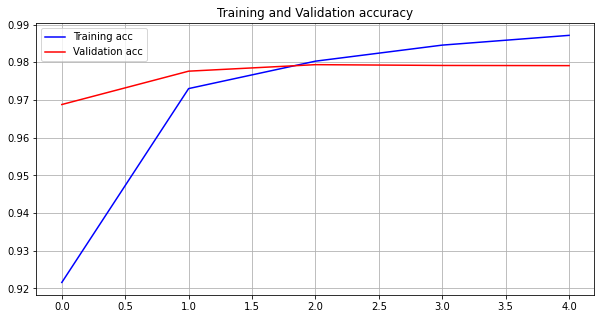

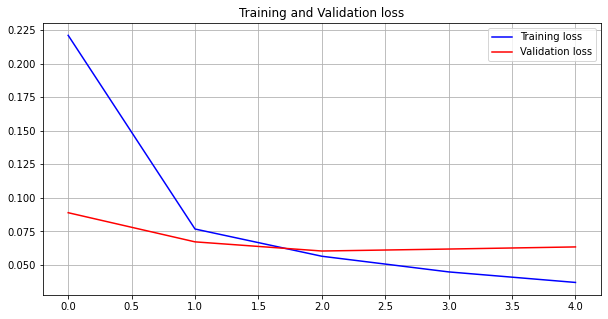

In [ ]:
plt.figure(figsize=(10,5))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.grid(True)
 
plt.figure(figsize=(10,5))
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.grid(True)
plt.legend()

plt.show()


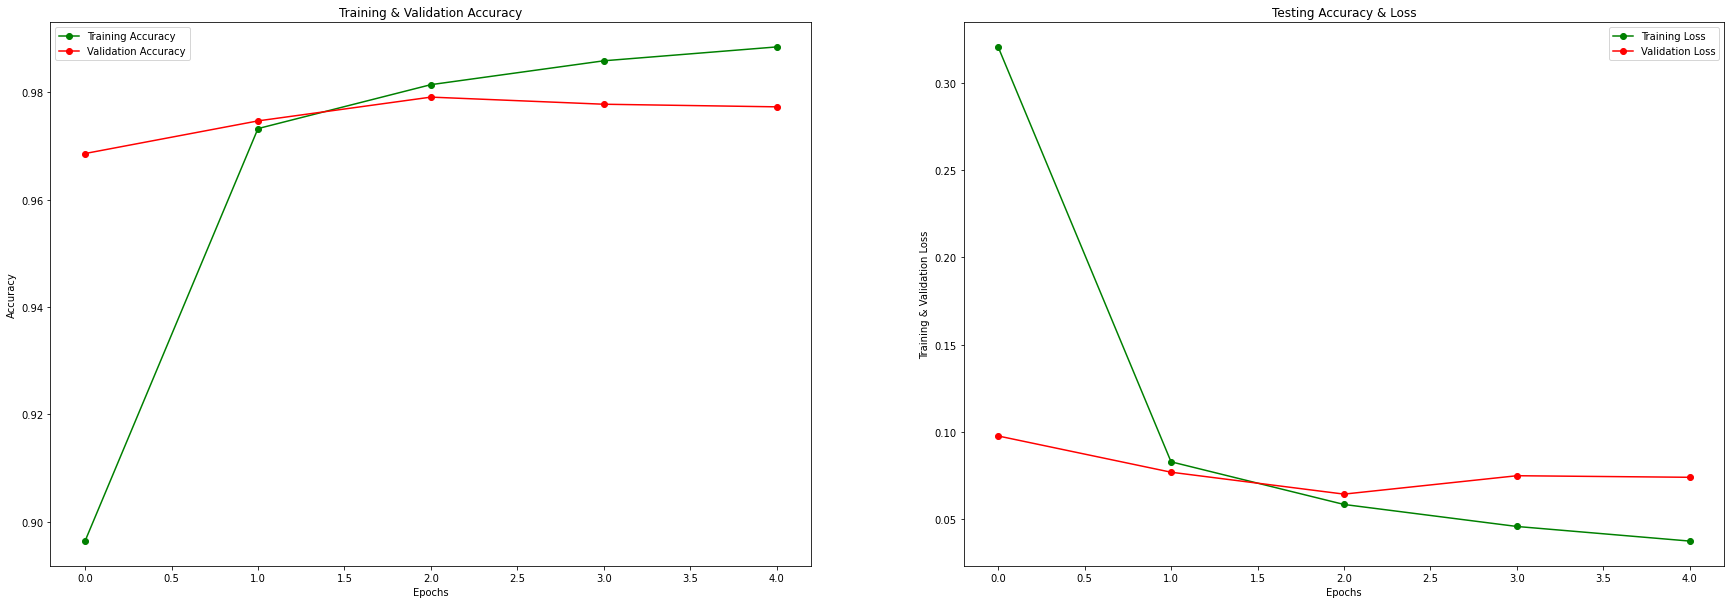

In [ ]:

epochs = [i for i in range(5)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(30,10)


ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')

ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")


ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

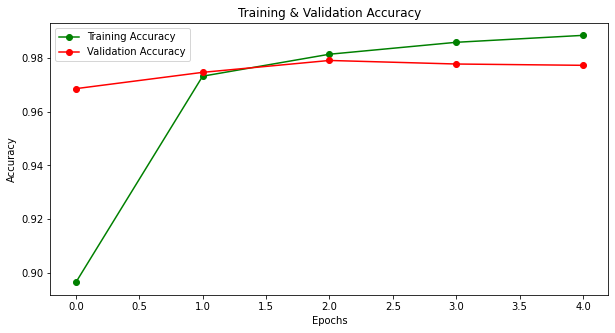

In [ ]:

epochs = [i for i in range(5)]

train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.figure(figsize=(10,5))


plt.plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
plt.plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
plt.title('Training & Validation Accuracy')

plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.show()

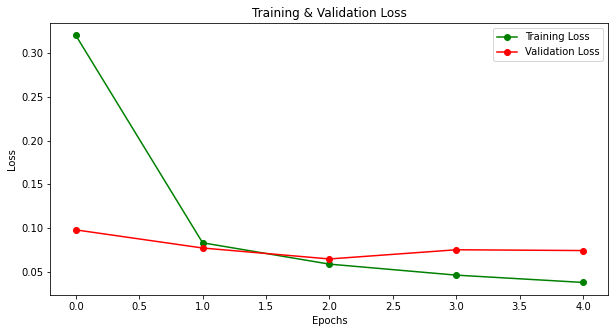

In [ ]:
epochs = [i for i in range(5)]

train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.figure(figsize=(10,5))


plt.plot(epochs , train_loss , 'go-' , label = 'Training Loss')
plt.plot(epochs , val_loss , 'ro-' , label = 'Validation Loss')
plt.title('Training & Validation Loss')

plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.show()